[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sensioai/blog/blob/master/026_frameworks/frameworks.ipynb)

# Frameworks de Redes Neuronales

En el [post]() anterior desarrollamos nuestro propio framework de redes neuronales, un conjunto de clases de `Python` que nos permiten resolver problemas con la arquitectura conocida como `Perceptrón Multicapa`. Si bien nuestro framework es funcional y flexible, requiere que implementemos nueva funcionalidad cada vez que queramos probar algo nuevo. De la misma manera, nuestra implementación no es en ningún caso óptima. Es por este motivo que, hoy en día, la mayoría de investigadores e ingenieros utilizan frameworks desarrollados por terceros para llevar a cabo sus proyectos. Esto mismo es lo que haremos nosotros de ahora en adelante, y en este post vamos a ver algunos de los frameworks más utilizados para poder escoger uno.

## ¿Qué le pedimos a un framework?

Ya seas estudiante, investigador, profesional o simplemente curioso llega un momento en el que tenemos que escoger un framework de `Deep Learning`. Hoy en día, la mayoría de frameworks nos ofrecen todo lo que podemos esperar, pero estos son varios puntos a tener en cuenta a la hora de elegir un framework:

- Código optimizado
- Procesado en paralelo (GPUs, TPUs)
- Soporte de la comunidad (nuevas arquitecturas, datasets, ...)
- Facilidad de uso (entender lo que se está haciendo)
- Ecosistema: investigación, desarrollo y producción (servidores, web, móvil, IoT, ...)

Aún así, dependiendo de tu flujo de trabajo o requisitos, es posible que te veas obligado a utilizar un framework en concreto (por ejemplo, CoreML para aplicaciones en iOS). El `Deep Learning` es una tecnología transversal, capaz de impactar multitud de industrias. Esto significa que, cuánto más fácil de utilizar sea un framework para gente que no está familiarizada con el mundo de la programación (médicos, artistas, arquitectos, atletas, ...), más impacto puede tener. Una vez vistas las características que le pedimos a un framework, éstas son las opciones más utilizadas hoy en día:

- [Tensorflow](https://www.tensorflow.org/) (Google)
- [Pytorch](https://pytorch.org/) (Facebook)
- [MXNet](https://mxnet.apache.org/) (Amazon)
- [CNTK](https://docs.microsoft.com/en-us/cognitive-toolkit/) (Microsoft)
- [CoreML](https://developer.apple.com/documentation/coreml) (Apple - iOS)

Puedes investigar los diferentes frameworks, ver ejemplos y probarlos para ver cuál se adapta mejor a tus necesidades. Sin embargo, a día de hoy, los claros ganadores en este ecosistema son `Tensorflow` y `Pytorch`.

## Tensorflow

Desarrollado por Google, `Tensorflow` es probablemente el framework más utilizado hoy en día (sobretodo en la industria). Este framework destaca por su gran ecosistema y herramientas disponibles a la hora de desplegar redes neuronales en aplicaciones web o móviles. Desde la publicación de la versión 2.X, se ha facilitado su uso y flexibilidad. Además, gracias a su API de alto nivel `Keras`, los usuarios de este framework pueden disfrutar de una gran funcionalidad con una simple implementación. Vamos a ver como resolver uno de los problemas en los que hemos trabajado anteriormente para comparar nuestra implementación con la que nos ofrece `Tensorflow`.

En primer lugar, descargamos el dataset *Iris* para clasificación de flores en 3 clases en función de la longitud y el ancho de sus pétalos.

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
Y = iris.target

# normalización datos
X_mean, X_std = X.mean(axis=0), X.std(axis=0)
X_norm = (X - X_mean) / X_std

X.shape, Y.shape

((150, 2), (150,))

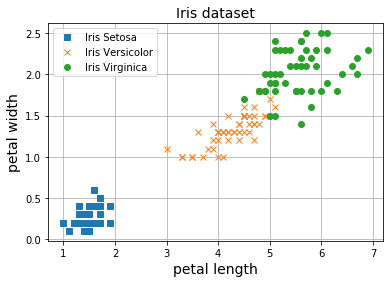

In [4]:
import matplotlib.pyplot as plt 

plt.plot(X[Y==0, 0], X[Y==0, 1], 's', label="Iris Setosa")
plt.plot(X[Y==1, 0], X[Y==1, 1], 'x', label="Iris Versicolor")
plt.plot(X[Y==2, 0], X[Y==2, 1], 'o', label="Iris Virginica")
plt.grid()
plt.legend()
plt.xlabel('petal length', fontsize=14)
plt.ylabel('petal width', fontsize=14)
plt.title("Iris dataset", fontsize=14)
plt.show()

Para empezar a trabajar con `Tensorflow`, primero tenemos que importarlo. Podrás instalarlo en tu máquina con el comando `pip install tenorflow`.

In [40]:
import tensorflow as tf
import tensorflow.keras as keras

tf.__version__

'2.3.0'

Ahora, definimos la arquitectura de nuestra red neuronal. Para ello tenemos varias opciones, en este caso utilizaremos la API funcional que nos ofrece `Keras`.

In [41]:
inputs = keras.Input(shape=(2,))
x = keras.layers.Dense(64, activation="relu")(inputs)
outputs = keras.layers.Dense(3)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                192       
_________________________________________________________________
dense_18 (Dense)             (None, 3)                 195       
Total params: 387
Trainable params: 387
Non-trainable params: 0
_________________________________________________________________


Como puedes ver, primero definimos la capa `Input` donde indicamos las dimensiones de nuestros datos de entrada. Después, definimos las diferentes capas que queremos utilizar. Aquí, usamos la capa `Dense` que es equivalente a nuestra capa `Linear`, el `Perceptrón`. Como puedes ver, en `Keras` podemos incluir la función de activación directamente en la misma capa. Puedes utilizar el número de capas `Dense` que quieras, siempre y cuando la última tenga tantas neuronas como clases para clasificar (en este caso 3). Una vez definidas las capas, podemos crear el objeto `model` el cual nos ofrece toda la funcionalidad que usaremos de ahora en adelante para entrenar y obtener predicciones. La funcioón `summary` nos da información muy interesante sobre nuestro modelo, como el número de capas, parámetros entrenables, etc. Una vez definida la arquitectura, usamos la función `compile` para indicar qué optimizador usaremos, la función de pérdida (con su correspondiente *learning rate*) y las métricas que deseamos observar durante el entrenamiento.

In [42]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.SGD(lr=0.1),
    metrics=["accuracy"],
)

Finalmente, podemos entrenar nuestro modelo con la función `fit` indicando el número de epochs y batch size de manera sencilla.

In [43]:
model.fit(X_norm, Y, batch_size=10, epochs=10)

Epoch 1/10
15/15 [==============================] - 0s 2ms/step - loss: 0.7394 - accuracy: 0.6667
Epoch 2/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5040 - accuracy: 0.8333
Epoch 3/10
15/15 [==============================] - 0s 2ms/step - loss: 0.4002 - accuracy: 0.9067
Epoch 4/10
15/15 [==============================] - 0s 3ms/step - loss: 0.3317 - accuracy: 0.9333
Epoch 5/10
15/15 [==============================] - 0s 2ms/step - loss: 0.2815 - accuracy: 0.9667
Epoch 6/10
15/15 [==============================] - 0s 2ms/step - loss: 0.2460 - accuracy: 0.9533
Epoch 7/10
15/15 [==============================] - 0s 2ms/step - loss: 0.2197 - accuracy: 0.9600
Epoch 8/10
15/15 [==============================] - 0s 4ms/step - loss: 0.1965 - accuracy: 0.9667
Epoch 9/10
15/15 [==============================] - 0s 2ms/step - loss: 0.1795 - accuracy: 0.9600
Epoch 10/10
15/15 [==============================] - 0s 2ms/step - loss: 0.1672 - accuracy: 0.9600


Finalmente, podemos obtener predicciones con la función `predict`, que en este caso utilizamos para generar la visualización de las fronteras de decisión.

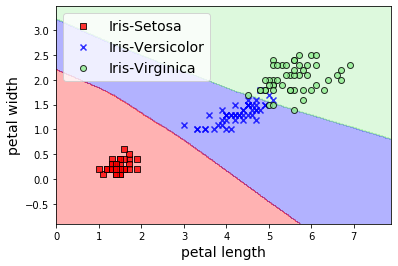

In [32]:
from matplotlib.colors import ListedColormap
import numpy as np

def softmax(x):
    return np.exp(x) / np.exp(x).sum(axis=-1,keepdims=True)

resolution=0.02
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(Y))])

# plot the decision surface
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                       np.arange(x2_min, x2_max, resolution))
X_new = (np.array([xx1.ravel(), xx2.ravel()]).T - X_mean)/X_std

# cálculo de predicciones
Z = model.predict(X_new)

Z = np.argmax(softmax(Z), axis=1) 
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.xlabel('petal length', fontsize=14)
plt.ylabel('petal width', fontsize=14)
classes = ["Iris-Setosa", "Iris-Versicolor", "Iris-Virginica"]
for idx, cl in enumerate(np.unique(Y)):
    plt.scatter(x=X[Y == cl, 0], 
                y=X[Y == cl, 1],
                alpha=0.8, 
                c=colors[idx],
                marker=markers[idx], 
                label=classes[cl], 
                edgecolor='black')
plt.legend(loc='upper left', fontsize=14)
plt.show()

Como puede ver, `Tensorflow` (y en particular `Keras`) nos permite resolver los problemas que ya conocemos de una manera muy sencilla. Obviamente, hay muchísimo más en `Tensorflow` y `Keras` de lo que hemos visto en este sencillo ejemplo (como por ejemplo guardar y cargar modelos, customizar el bucle de entrenamiento, etc). El objetivo es simplemente el de presentar estas nuevas herramientas y cómo utilizarlas para resolver los casos que hemos visto en posts anteriores. En posts futuros entraremos en más detalle en la funcionalidad que nos ofrece `Tensorflow` resolviendo problemas mucho más interesantes.

## Pytorch